In [1]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('paper')

In [2]:
def makesim(dtOverT = 0.01):
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=1.e-3, P=1.)
    sim.add(m=1.e-3/3., a=sim.particles[1].a*2)
    sim.move_to_com()
    sim.dt = dtOverT*sim.particles[1].P
    return sim

In [4]:
Nout = 1000
dtOverT = 0.01#np.sqrt(3.)/100.
times = np.linspace(0, 10, Nout)

In [5]:
simLF = makesim(dtOverT=dtOverT)
rebxLF = reboundx.Extras(simLF)
simLF.integrator = "none"
drift = rebxLF.load_operator("drift")
kick = rebxLF.load_operator("kick")
rebxLF.add_operator(drift, dt_fraction=1., timing="post")
rebxLF.add_operator(kick, dt_fraction=1., timing="post")

simKI = makesim(dtOverT=dtOverT)
rebxKI = reboundx.Extras(simKI)
simKI.integrator = "none"
kepler = rebxKI.load_operator("kepler")
inter = rebxKI.load_operator("interaction")
rebxKI.add_operator(kepler, dt_fraction=1., timing="post")
rebxKI.add_operator(inter, dt_fraction=1., timing="post")

EsKI, EsLF = np.zeros(Nout), np.zeros(Nout)
E0 = simKI.calculate_energy()
for i, time in enumerate(times):
    simLF.integrate(time, exact_finish_time=0)
    simKI.integrate(time, exact_finish_time=0)
    EKI = simKI.calculate_energy()
    ELF = simLF.calculate_energy()
    EsKI[i] = np.abs((EKI-E0)/E0)
    EsLF[i] = np.abs((ELF-E0)/E0)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


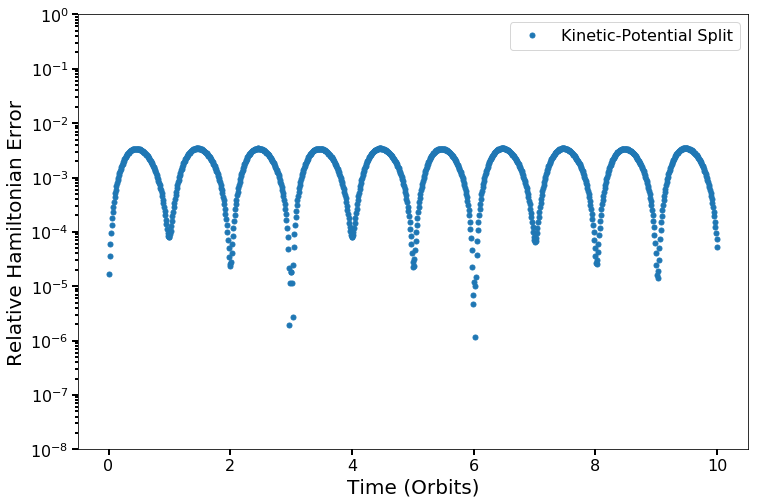

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(times, EsLF, '.', label="Kinetic-Potential Split")
#ax.plot(times, EsKI, '.')

ax.set_yscale('log')
#ax.plot(times, [(2*np.pi)/2.*dtOverT]*len(times), '--r')
ax.set_ylabel('Relative Hamiltonian Error')
ax.set_xlabel('Time (Orbits)')
ax.set_ylim([1e-8, 1])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


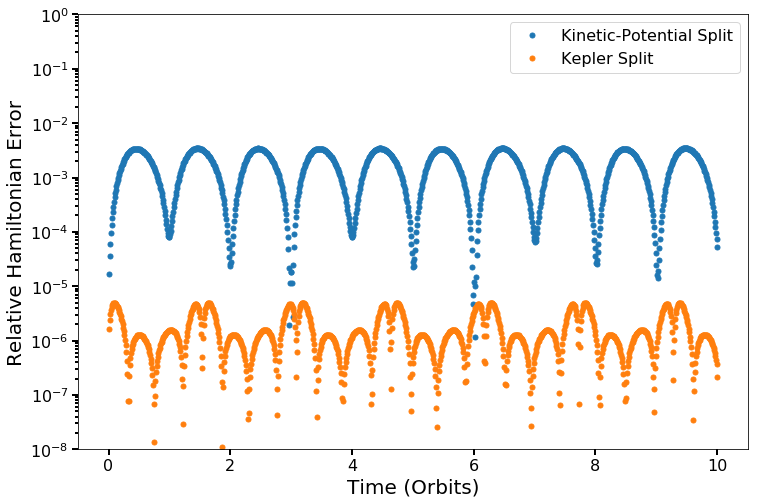

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(times, EsLF, '.', label="Kinetic-Potential Split")
ax.plot(times, EsKI, '.', label='Kepler Split')

ax.set_yscale('log')
#ax.plot(times, [(2*np.pi)/2.*dtOverT]*len(times), '--r')
ax.set_ylabel('Relative Hamiltonian Error')
ax.set_xlabel('Time (Orbits)')
ax.set_ylim([1e-8, 1])
ax.legend()